In [16]:
# Bagging Ensemble Technique

# Random Forest 

# Travel Co. dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings;warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [19]:
# Feature Engg.
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [21]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [22]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [23]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [24]:
df['MaritalStatus'].unique()

array(['Unmarried', 'Divorced', 'Married'], dtype=object)

In [25]:
# missing values

features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]

for feature in features_with_na:
    print(f'"{feature}" has {df[feature].isnull().mean()*100:.4f}% missing values')

"Age" has 4.6236% missing values
"TypeofContact" has 0.5115% missing values
"DurationOfPitch" has 5.1350% missing values
"NumberOfFollowups" has 0.9206% missing values
"PreferredPropertyStar" has 0.5319% missing values
"NumberOfTrips" has 2.8642% missing values
"NumberOfChildrenVisiting" has 1.3502% missing values
"MonthlyIncome" has 4.7668% missing values


In [26]:
# replacing na/missing values

df['Age'].fillna(df['Age'].median(),inplace=True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [27]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [28]:
# dropping non-essential features

df.drop('CustomerID',axis=1,inplace=True)

In [33]:
df.head(0)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,n_Visitors


In [32]:
df['n_Visitors'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']

df.drop(['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [36]:
# segregating features

num_cols = [feats for feats in df.columns if df[feats].dtype != 'O']

cat_cols = [feats for feats in df.columns if df[feats].dtype == 'O']

discrete_feats = [feat for feat in num_cols if len(df[feat].unique())<=25]

continuos_feats = [feat for feat in num_cols if feat not in discrete_feats]

In [38]:
# separating features & target
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [39]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
# Handling 
cat_feats = X.select_dtypes(include='object').columns
num_feats = X.select_dtypes(exclude='object').columns

In [42]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_scaler = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [('one hot E',oh_encoder,cat_feats),
     ('Stdardized',num_scaler,num_feats)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

models = {
    'Random Forest':RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier()
}

for name,model in models.items():
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('Model performance for training data')
    print(f'{name} has accuracy_score = {accuracy_score(y_train,y_train_pred)}')
    print(f'{name} has confusion matrix = {confusion_matrix(y_train,y_train_pred)}')
    print(f'{name} has report = {classification_report(y_train,y_train_pred)}')

    print('-----------------------------')
    print('Model performance for test data')
    print(f'{name} has accuracy_score = {accuracy_score(y_test,y_test_pred)}')
    print(f'{name} has confusion matrix = {confusion_matrix(y_test,y_test_pred)}')
    print(f'{name} has report = {classification_report(y_test,y_test_pred)}')

Model performance for training data
Random Forest has accuracy_score = 1.0
Random Forest has confusion matrix = [[3181    0]
 [   0  729]]
Random Forest has report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00       729

    accuracy                           1.00      3910
   macro avg       1.00      1.00      1.00      3910
weighted avg       1.00      1.00      1.00      3910

-----------------------------
Model performance for test data
Random Forest has accuracy_score = 0.9274028629856851
Random Forest has confusion matrix = [[785   2]
 [ 69 122]]
Random Forest has report =               precision    recall  f1-score   support

           0       0.92      1.00      0.96       787
           1       0.98      0.64      0.77       191

    accuracy                           0.93       978
   macro avg       0.95      0.82      0.87       978
weighted avg       0.93      0.9

In [51]:
# hyperparametres tunning

rf_params={'max_depth':[5,8,15,None,10],
           'max_features':[5,7,'auto',8],
           'min_samples_split':[2,8,15,20],
           'n_estimators':[100,200,500,1000]
          }

In [53]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

randomcv_models=[
    ('Random Forest C',RandomForestClassifier(),rf_params)
    ]

model_params={}

for name,model,params in randomcv_models:
    random = RandomizedSearchCV(model,
                                cv=3,
                                param_distributions=params,
                                n_iter=100)

    random.fit(X_train,y_train)

    model_params[name] = random.best_params_

for model_name in model_params:
    print(f'-----Best Params for {model_name}-----')
    print(model_params[model_name])

-----Best Params for Random Forest C-----
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [56]:
# substituing best params 

models = {
    'Random Forest':RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= None),
}

for name,model in models.items():
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('Model performance for training data')
    print(f'{name} has accuracy_score = {accuracy_score(y_train,y_train_pred)}')
    print(f'{name} has confusion matrix = {confusion_matrix(y_train,y_train_pred)}')
    print(f'{name} has report = {classification_report(y_train,y_train_pred)}')

    print('-----------------------------')
    print('Model performance for test data')
    print(f'{name} has accuracy_score = {accuracy_score(y_test,y_test_pred)}')
    print(f'{name} has confusion matrix = {confusion_matrix(y_test,y_test_pred)}')
    print(f'{name} has report = {classification_report(y_test,y_test_pred)}')
    print(f'{name} has auc = {roc_auc_score(y_test,y_test_pred)}')

Model performance for training data
Random Forest has accuracy_score = 1.0
Random Forest has confusion matrix = [[3181    0]
 [   0  729]]
Random Forest has report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00       729

    accuracy                           1.00      3910
   macro avg       1.00      1.00      1.00      3910
weighted avg       1.00      1.00      1.00      3910

-----------------------------
Model performance for test data
Random Forest has accuracy_score = 0.9386503067484663
Random Forest has confusion matrix = [[783   4]
 [ 56 135]]
Random Forest has report =               precision    recall  f1-score   support

           0       0.93      0.99      0.96       787
           1       0.97      0.71      0.82       191

    accuracy                           0.94       978
   macro avg       0.95      0.85      0.89       978
weighted avg       0.94      0.9

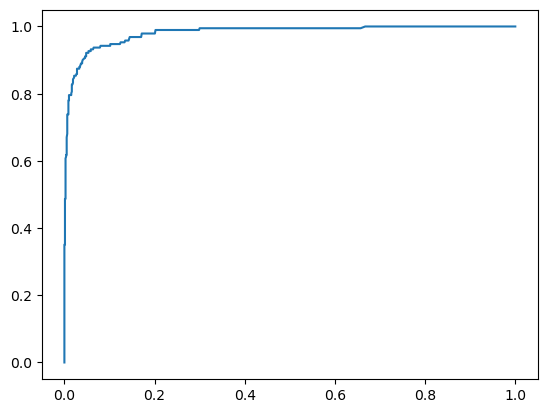

In [60]:
# plotting ROC curve 

auc_model=[
    {'label':'RF-Classifier',
     'model':RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= None),
     'auc' : 0.85}
]

for algo in auc_model:
    model = algo['model']
    model.fit(X_train,y_train)
    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    auc_score = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc_score:.2f})")